Load modules/packages.

In [1]:
import pygam
import pandas
import numpy
import numpy.random
import seaborn
import matplotlib.pyplot 
import vtreat
import vtreat.util

Generate example data.

In [2]:
d = pandas.DataFrame({'x':[0.1*i for i in range(200)]})
d['y'] = numpy.sin(d['x']) + 0.1*numpy.random.normal(size=d.shape[0])
d['xc'] = ['level_' + str(5*numpy.round(yi/5, 1)) for yi in d['y']]
d.head()

,x,y,xc
0,0.0,-0.079203,level_-0.0
1,0.1,0.248105,level_0.0
2,0.2,0.286616,level_0.5
3,0.3,0.425919,level_0.5
4,0.4,0.187851,level_0.0


In [3]:
d.tail()

,x,y,xc
195,19.5,0.533498,level_0.5
196,19.6,0.715248,level_0.5
197,19.7,0.758336,level_1.0
198,19.8,0.913604,level_1.0
199,19.9,0.832409,level_1.0


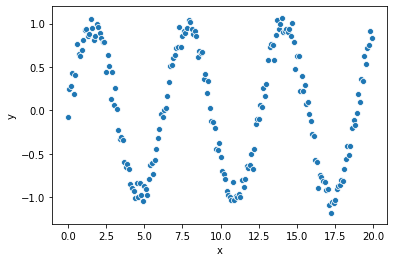

In [4]:
seaborn.scatterplot(x='x', y='y', data=d)

Fit a regression transform (numeric).

In [5]:
transform = vtreat.NumericOutcomeTreatment(
    outcome_name='y')

In [6]:
d_prepared = transform.fit_transform(d, d['y'])
d_prepared.head()

,y,x,xc_impact_code,xc_prevalence_code,xc_lev_level_1.0,xc_lev_level_-1.0,xc_lev_level_0.5,xc_lev_level_-0.5
0,-0.079203,0.0,-0.128768,0.08,0,0,0,0
1,0.248105,0.1,0.082777,0.09,0,0,0,0
2,0.286616,0.2,0.490657,0.20,0,0,1,0
3,0.425919,0.3,0.517918,0.20,0,0,1,0
4,0.187851,0.4,0.093067,0.09,0,0,0,0


Plot cross-validated version.

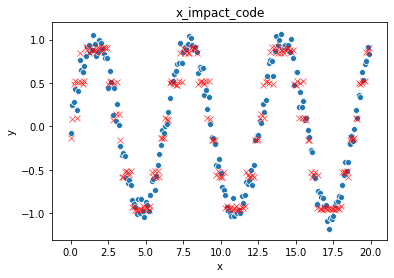

In [7]:
seaborn.scatterplot(x='x', y='y', data=d_prepared) 
ax = seaborn.scatterplot(x='x', y='xc_impact_code', data=d_prepared,
                    marker="x", color='red', alpha=0.75)
ax.set(ylabel='y')
txt = matplotlib.pyplot.title("x_impact_code")

Build a non cross-validated version.

In [8]:
d_xform = transform.transform(d)
d_xform['xc'] = d['xc']
d_xform.head()

,y,x,xc_impact_code,xc_prevalence_code,xc_lev_level_1.0,xc_lev_level_-1.0,xc_lev_level_0.5,xc_lev_level_-0.5,xc
0,-0.079203,0.0,-0.143197,0.08,0,0,0,0,level_-0.0
1,0.248105,0.1,0.098745,0.09,0,0,0,0,level_0.0
2,0.286616,0.2,0.501317,0.20,0,0,1,0,level_0.5
3,0.425919,0.3,0.501317,0.20,0,0,1,0,level_0.5
4,0.187851,0.4,0.098745,0.09,0,0,0,0,level_0.0


In [9]:
d_prepared['xc'] = d['xc']
d_prepared.head()

,y,x,xc_impact_code,xc_prevalence_code,xc_lev_level_1.0,xc_lev_level_-1.0,xc_lev_level_0.5,xc_lev_level_-0.5,xc
0,-0.079203,0.0,-0.128768,0.08,0,0,0,0,level_-0.0
1,0.248105,0.1,0.082777,0.09,0,0,0,0,level_0.0
2,0.286616,0.2,0.490657,0.20,0,0,1,0,level_0.5
3,0.425919,0.3,0.517918,0.20,0,0,1,0,level_0.5
4,0.187851,0.4,0.093067,0.09,0,0,0,0,level_0.0


For cross-frames (built via `.fit_transform()`) the impact codes are functios of both the level being encoded and the cross-validation group used in construction.  So the impact codes are *not* a function of just the level during training. This is part of what helps fight nested model bias driven over-fit during model training.

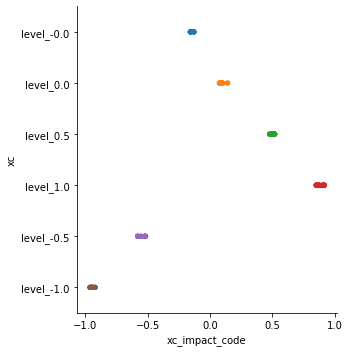

In [10]:
seaborn.catplot(x='xc_impact_code', y='xc', data=d_prepared,
                jitter=False)

Through the normal `.transform()` path the impact value *is* a function of the level.

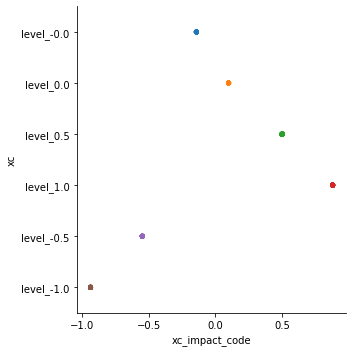

In [11]:
seaborn.catplot(x='xc_impact_code', y='xc', data=d_xform,
                jitter=False)